In [1]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
import scipy.stats as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
url = 'https://drive.google.com/uc?export=download&id=1MVobO6ko3bxFzdgq8j-_949H-L5LgPUD'
df_original = pd.read_csv(url)
df = df_original.copy()

In [3]:
# Import the necessary library
from sklearn.preprocessing import OneHotEncoder

# Separate ordinal and nominal variables
ordinal_vars = ['Gender', 'BMI Category']  # Good for Label Encoding
nominal_vars = ['Occupation', 'Sleep Disorder']  # Requires One-Hot Encoding

# Apply Label Encoding to ordinal variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])

# Apply One-Hot Encoding to nominal variables - CREATE SEPARATE ENCODER FOR EACH
ohe_occupation = OneHotEncoder(sparse_output=False, drop='first')  # encoder for Occupation
ohe_sleep = OneHotEncoder(sparse_output=False, drop='first')       # encoder for Sleep Disorder

# Fit and transform each nominal variable separately
occupation_encoded = ohe_occupation.fit_transform(df[['Occupation']])
sleep_disorder_encoded = ohe_sleep.fit_transform(df[['Sleep Disorder']])

# Get feature names for the encoded columns
occupation_feature_names = ohe_occupation.get_feature_names_out(['Occupation'])
sleep_disorder_feature_names = ohe_sleep.get_feature_names_out(['Sleep Disorder'])

# Create DataFrames from the encoded arrays
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_feature_names)
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_feature_names)

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, occupation_df, sleep_disorder_df], axis=1)

# Drop the original nominal columns
df.drop(columns=['Occupation', 'Sleep Disorder'], inplace=True)

# Display the results
print("DataFrame shape after encoding:", df.shape)
print("\nNew columns added:")
print([col for col in df.columns if 'Occupation_' in col or 'Sleep_Disorder_' in col])

DataFrame shape after encoding: (15000, 23)

New columns added:
['Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher']


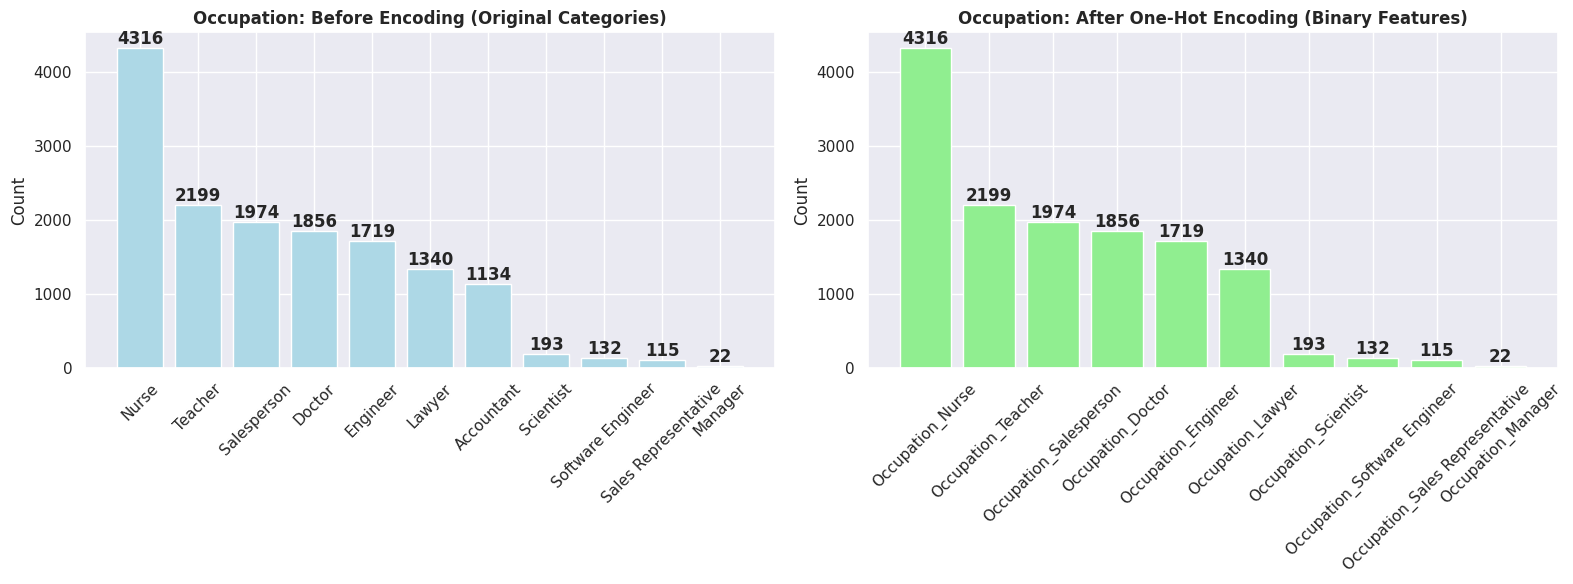

In [4]:
# Create comparison visualization for Occupation encoding
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before Encoding - Original Categories
value_counts_before = df_original['Occupation'].value_counts()
bars_before = ax1.bar(value_counts_before.index, value_counts_before.values, color='lightblue')
ax1.set_title('Occupation: Before Encoding (Original Categories)', fontweight='bold')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
# Add values on bars
for bar, value in zip(bars_before, value_counts_before.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}',
             ha='center', va='bottom', fontweight='bold')

# After Encoding - One-Hot Encoding Representation
occupation_cols = [col for col in df.columns if 'Occupation_' in col]
value_counts_after = df[occupation_cols].sum().sort_values(ascending=False)
bars_after = ax2.bar(value_counts_after.index, value_counts_after.values, color='lightgreen')
ax2.set_title('Occupation: After One-Hot Encoding (Binary Features)', fontweight='bold')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
# Add values on bars
for bar, value in zip(bars_after, value_counts_after.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{int(value)}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_columns))
print("Categorical Columns:", list(categorical_columns))

Numeric Columns: ['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea']
Categorical Columns: ['Blood Pressure']
